In [1]:
#import three paris pickle files
import pandas as pd
import numpy as np

df319 = pd.read_pickle('paris319.pkl')
df320 = pd.read_pickle('paris320.pkl')
df321 = pd.read_pickle('paris321.pkl')
df332 = pd.read_pickle('paris332.pkl')




                          time  timestep   maxtimestep        icao24  \
time                  1.000000  0.014135  5.574326e-02 -1.246471e-02   
timestep              0.014135  1.000000  2.498577e-01 -1.730505e-02   
maxtimestep           0.055743  0.249858  1.000000e+00 -6.925961e-02   
icao24               -0.012465 -0.017305 -6.925961e-02  1.000000e+00   
callsign              0.012800 -0.085586 -3.425380e-01  4.635624e-02   
baroaltitude          0.005182  0.967529  1.586724e-01 -6.870323e-03   
lat                   0.008103 -0.329167  3.948829e-02 -1.560398e-02   
lon                   0.034452  0.353079  1.709994e-01  4.624123e-02   
velocity              0.012614  0.837162  1.280429e-01  1.113748e-02   
segment               0.999667  0.013686  5.477478e-02 -1.211040e-02   
modeltype            -0.019772 -0.037603 -1.504976e-01 -3.344941e-03   
operator             -0.022273  0.019027  7.615203e-02  2.586506e-01   
fromICAO             -0.036032 -0.051296 -2.053029e-01  1.073168

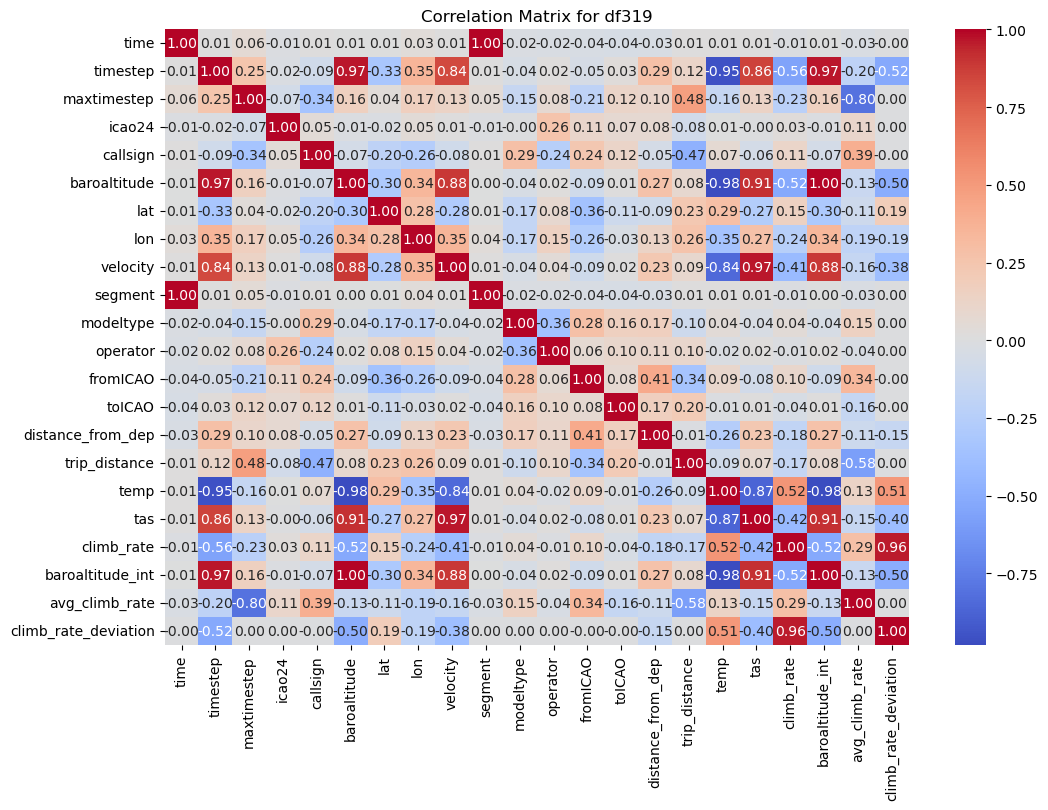

In [74]:
import seaborn as sns

df319
df319['climb_rate']=df319.groupby('segment')['baroaltitude'].diff() / 15
# Calculate the correlation matrix
correlation_matrix = df319.corr()

# Plot the correlation matrix using a heatmap
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for df319')
plt.show()

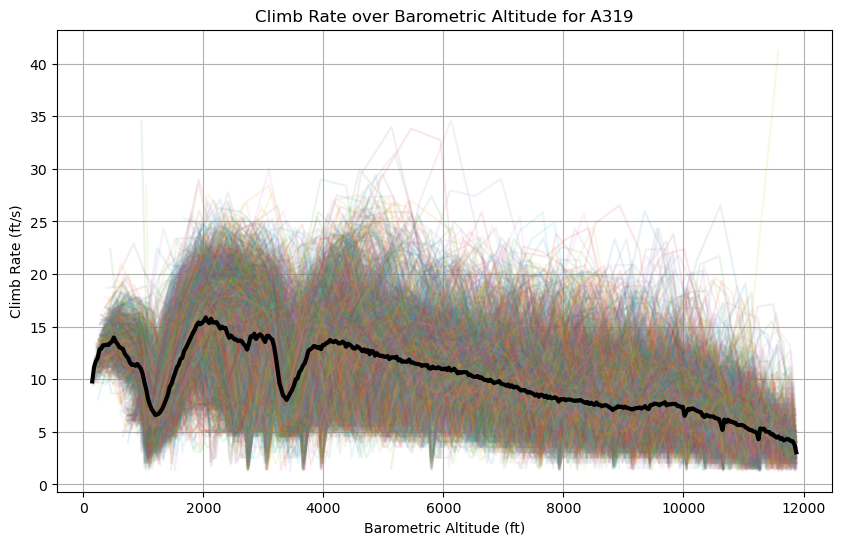

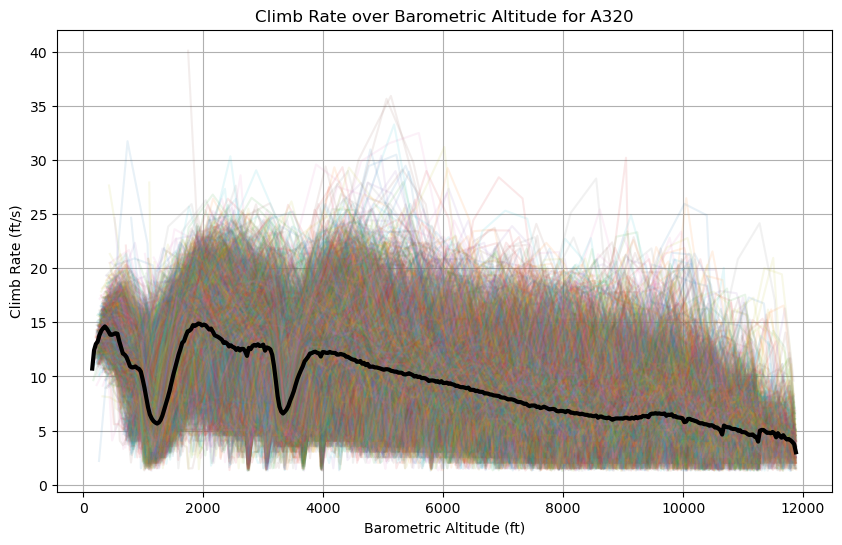

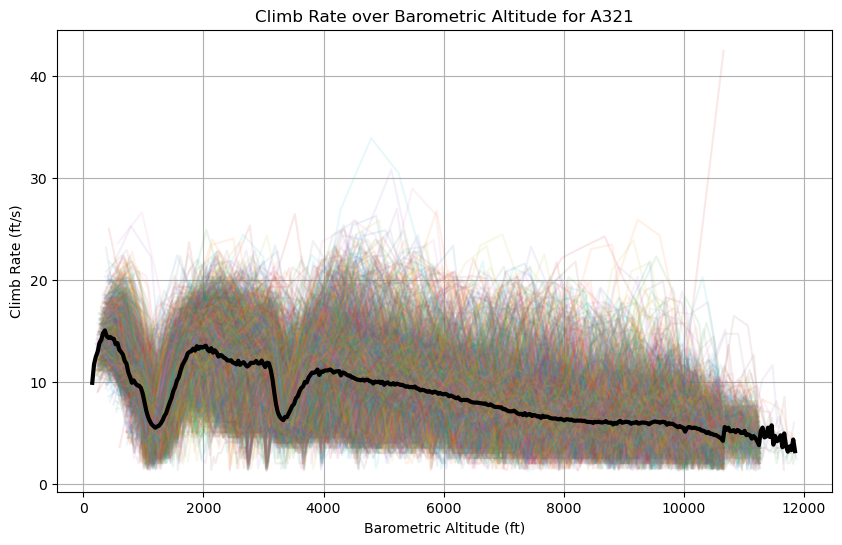

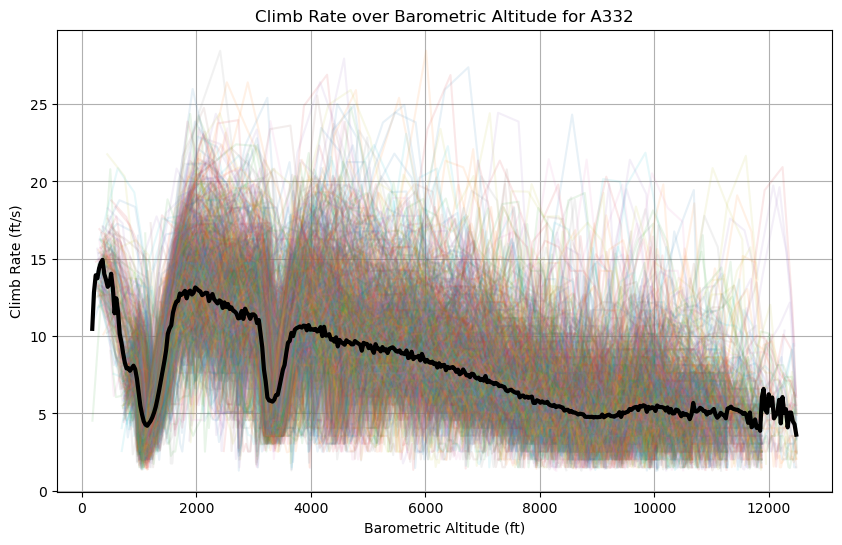

In [65]:
df319['climb_rate']=df319.groupby('segment')['baroaltitude'].diff() / 15
df320['climb_rate']=df320.groupby('segment')['baroaltitude'].diff() / 15
df321['climb_rate']=df321.groupby('segment')['baroaltitude'].diff() / 15
df332['climb_rate']=df332.groupby('segment')['baroaltitude'].diff() / 15

def plot_climb_rate_vs_baroaltitude(df, name):
    # Plot climb rate over baroaltitude for each flight as a line graph
    plt.figure(figsize=(10, 6))
    for segment, group in df.groupby('segment'):
        plt.plot(group['baroaltitude'], group['climb_rate'], alpha=0.1, label=f'Segment {segment}')
    plt.xlabel('Barometric Altitude (ft)')
    plt.ylabel('Climb Rate (ft/s)')
    # rename title, instead of each flight, include the number behind the df

    plt.title('Climb Rate over Barometric Altitude for ' + name)

    # Calculate the average climb rate for each 100m interval of baroaltitude
    df['baroaltitude_int'] = df['baroaltitude'] // 30 * 30
    df_avg_climb_rate = df.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()

    # Show this average climb rate over baroaltitude as a line graph
    plt.plot(df_avg_climb_rate['baroaltitude_int'], df_avg_climb_rate['climb_rate'], color='black', linestyle='-', linewidth=3, label='Average Climb Rate')

    plt.grid(True)
    plt.show()

# Call the function with the dataframe
plot_climb_rate_vs_baroaltitude(df319, 'A319')
plot_climb_rate_vs_baroaltitude(df320, 'A320')
plot_climb_rate_vs_baroaltitude(df321, 'A321')
plot_climb_rate_vs_baroaltitude(df332, 'A332')



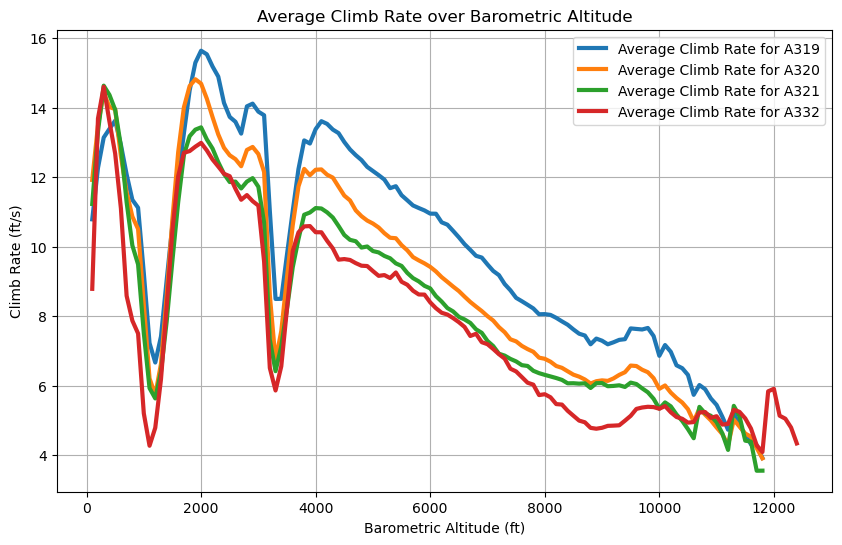

In [67]:
# Prepare the figure for the plot
plt.figure(figsize=(10, 6))

# Plot the average climb rate for each 100m interval of baroaltitude for df319
df319['baroaltitude_int'] = df319['baroaltitude'] // 100 * 100
df319_avg_climb_rate = df319.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df319_avg_climb_rate['baroaltitude_int'], df319_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A319')

# Plot the average climb rate for each 100m interval of baroaltitude for df320
df320['baroaltitude_int'] = df320['baroaltitude'] // 100 * 100
df320_avg_climb_rate = df320.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df320_avg_climb_rate['baroaltitude_int'], df320_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A320')

# Plot the average climb rate for each 100m interval of baroaltitude for df321
df321['baroaltitude_int'] = df321['baroaltitude'] // 100 * 100
df321_avg_climb_rate = df321.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df321_avg_climb_rate['baroaltitude_int'], df321_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A321')

# Plot the average climb rate for each 100m interval of baroaltitude for df332
df332['baroaltitude_int'] = df332['baroaltitude'] // 100 * 100
df332_avg_climb_rate = df332.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df332_avg_climb_rate['baroaltitude_int'], df332_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A332')

# Add labels, title, grid, and legend
plt.xlabel('Barometric Altitude (ft)')
plt.ylabel('Climb Rate (ft/s)')
plt.title('Average Climb Rate over Barometric Altitude')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()